In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
pwd

'C:\\Users\\hp\\Python-for-Finance-Repo-master\\05-Pandas-with-Time-Series'

In [3]:
ls

 Volume in drive C is Windows
 Volume Serial Number is 0412-F4F3

 Directory of C:\Users\hp\Python-for-Finance-Repo-master\05-Pandas-with-Time-Series

17-Sep-17  02:07 PM    <DIR>          .
17-Sep-17  02:07 PM    <DIR>          ..
17-Sep-17  02:06 PM    <DIR>          .ipynb_checkpoints
17-Sep-17  02:05 PM             8,740 DateTime Index (self).ipynb
09-Aug-17  01:00 AM             8,887 Datetime Index.ipynb
09-Aug-17  01:00 AM           339,454 Rolling and Expanding.ipynb
17-Sep-17  02:07 PM             1,397 Time Resampling (self).ipynb
09-Aug-17  01:00 AM            55,924 Time Resampling.ipynb
09-Aug-17  01:00 AM            24,777 Time Shifting.ipynb
09-Sep-17  11:03 PM    <DIR>          time_data
               6 File(s)        439,179 bytes
               4 Dir(s)  334,787,244,032 bytes free


In [4]:
df = pd.read_csv('time_data/walmart_stock.csv')

In [5]:
df.head()

,Date,Open,High,Low,Close,Volume,Adj Close
0,2012-01-03,59.970001,61.060001,59.869999,60.330002,12668800,52.619235
1,2012-01-04,60.209999,60.349998,59.470001,59.709999,9593300,52.078475
2,2012-01-05,59.349998,59.619999,58.369999,59.419998,12768200,51.825539
3,2012-01-06,59.419998,59.450001,58.869999,59.000000,8069400,51.459220
4,2012-01-09,59.029999,59.549999,58.919998,59.180000,6679300,51.616215


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1258 entries, 0 to 1257
Data columns (total 7 columns):
Date         1258 non-null object
Open         1258 non-null float64
High         1258 non-null float64
Low          1258 non-null float64
Close        1258 non-null float64
Volume       1258 non-null int64
Adj Close    1258 non-null float64
dtypes: float64(5), int64(1), object(1)
memory usage: 68.9+ KB


In [7]:
df['Date'] = pd.to_datetime(df['Date'])

In [8]:
df.head()

,Date,Open,High,Low,Close,Volume,Adj Close
0,2012-01-03,59.970001,61.060001,59.869999,60.330002,12668800,52.619235
1,2012-01-04,60.209999,60.349998,59.470001,59.709999,9593300,52.078475
2,2012-01-05,59.349998,59.619999,58.369999,59.419998,12768200,51.825539
3,2012-01-06,59.419998,59.450001,58.869999,59.000000,8069400,51.459220
4,2012-01-09,59.029999,59.549999,58.919998,59.180000,6679300,51.616215


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1258 entries, 0 to 1257
Data columns (total 7 columns):
Date         1258 non-null datetime64[ns]
Open         1258 non-null float64
High         1258 non-null float64
Low          1258 non-null float64
Close        1258 non-null float64
Volume       1258 non-null int64
Adj Close    1258 non-null float64
dtypes: datetime64[ns](1), float64(5), int64(1)
memory usage: 68.9 KB


In [11]:
# df['Date'] = df['Date'].apply(pd.to_datetime)

In [12]:
df.set_index('Date',inplace=True)

In [13]:
df

,Open,High,Low,Close,Volume,Adj Close
Date,,,,,,
2012-01-03,59.970001,61.060001,59.869999,60.330002,12668800,52.619235
2012-01-04,60.209999,60.349998,59.470001,59.709999,9593300,52.078475
2012-01-05,59.349998,59.619999,58.369999,59.419998,12768200,51.825539
2012-01-06,59.419998,59.450001,58.869999,59.000000,8069400,51.459220
2012-01-09,59.029999,59.549999,58.919998,59.180000,6679300,51.616215
2012-01-10,59.430000,59.709999,58.980000,59.040001,6907300,51.494109
2012-01-11,59.060001,59.529999,59.040001,59.400002,6365600,51.808098
2012-01-12,59.790001,60.000000,59.400002,59.500000,7236400,51.895316
2012-01-13,59.180000,59.610001,59.009998,59.540001,7729300,51.930204


In [14]:
df = pd.read_csv('time_data/walmart_stock.csv',index_col='Date',parse_dates=True)

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1258 entries, 2012-01-03 to 2016-12-30
Data columns (total 6 columns):
Open         1258 non-null float64
High         1258 non-null float64
Low          1258 non-null float64
Close        1258 non-null float64
Volume       1258 non-null int64
Adj Close    1258 non-null float64
dtypes: float64(5), int64(1)
memory usage: 68.8 KB


In [16]:
df.index

DatetimeIndex(['2012-01-03', '2012-01-04', '2012-01-05', '2012-01-06',
               '2012-01-09', '2012-01-10', '2012-01-11', '2012-01-12',
               '2012-01-13', '2012-01-17',
               ...
               '2016-12-16', '2016-12-19', '2016-12-20', '2016-12-21',
               '2016-12-22', '2016-12-23', '2016-12-27', '2016-12-28',
               '2016-12-29', '2016-12-30'],
              dtype='datetime64[ns]', name='Date', length=1258, freq=None)

In [17]:
df

,Open,High,Low,Close,Volume,Adj Close
Date,,,,,,
2012-01-03,59.970001,61.060001,59.869999,60.330002,12668800,52.619235
2012-01-04,60.209999,60.349998,59.470001,59.709999,9593300,52.078475
2012-01-05,59.349998,59.619999,58.369999,59.419998,12768200,51.825539
2012-01-06,59.419998,59.450001,58.869999,59.000000,8069400,51.459220
2012-01-09,59.029999,59.549999,58.919998,59.180000,6679300,51.616215
2012-01-10,59.430000,59.709999,58.980000,59.040001,6907300,51.494109
2012-01-11,59.060001,59.529999,59.040001,59.400002,6365600,51.808098
2012-01-12,59.790001,60.000000,59.400002,59.500000,7236400,51.895316
2012-01-13,59.180000,59.610001,59.009998,59.540001,7729300,51.930204


In [18]:
df.index

DatetimeIndex(['2012-01-03', '2012-01-04', '2012-01-05', '2012-01-06',
               '2012-01-09', '2012-01-10', '2012-01-11', '2012-01-12',
               '2012-01-13', '2012-01-17',
               ...
               '2016-12-16', '2016-12-19', '2016-12-20', '2016-12-21',
               '2016-12-22', '2016-12-23', '2016-12-27', '2016-12-28',
               '2016-12-29', '2016-12-30'],
              dtype='datetime64[ns]', name='Date', length=1258, freq=None)

In [19]:
df.resample(rule='A')

DatetimeIndexResampler [freq=<YearEnd: month=12>, axis=0, closed=right, label=right, convention=start, base=0]

In [20]:
df.resample(rule='A').mean()

,Open,High,Low,Close,Volume,Adj Close
Date,,,,,,
2012-12-31,67.158680,67.602120,66.786520,67.215120,9.239015e+06,59.389349
2013-12-31,75.264048,75.729405,74.843055,75.320516,6.951496e+06,68.147179
2014-12-31,77.274524,77.740040,76.864405,77.327381,6.515612e+06,71.709712
2015-12-31,72.569405,73.064167,72.034802,72.491111,9.040769e+06,68.831426
2016-12-31,69.481349,70.019643,69.023492,69.547063,9.371645e+06,68.054229


In [21]:
df.resample(rule='Q').mean()

,Open,High,Low,Close,Volume,Adj Close
Date,,,,,,
2012-03-31,60.462903,60.807258,60.160484,60.519516,8.850221e+06,52.881839
2012-06-30,62.888889,63.400159,62.592222,63.057143,1.155795e+07,55.594392
2012-09-30,73.081587,73.549682,72.717619,73.174921,7.871587e+06,64.891949
2012-12-31,72.174678,72.623226,71.647741,72.079839,8.660958e+06,64.161672
2013-03-31,70.898834,71.393000,70.552666,71.026000,8.482003e+06,63.581880
2013-06-30,76.873906,77.417813,76.413281,76.885781,7.656086e+06,69.393600
2013-09-30,75.637969,76.030469,75.213594,75.629063,5.796625e+06,68.676662
2013-12-31,77.372656,77.805313,76.924531,77.472813,5.966927e+06,70.651242
2014-03-31,75.339344,75.802787,74.863278,75.337213,7.050402e+06,69.106983


In [22]:
df.resample(rule='BQ').mean()

,Open,High,Low,Close,Volume,Adj Close
Date,,,,,,
2012-03-30,60.462903,60.807258,60.160484,60.519516,8.850221e+06,52.881839
2012-06-29,62.888889,63.400159,62.592222,63.057143,1.155795e+07,55.594392
2012-09-28,73.081587,73.549682,72.717619,73.174921,7.871587e+06,64.891949
2012-12-31,72.174678,72.623226,71.647741,72.079839,8.660958e+06,64.161672
2013-03-29,70.898834,71.393000,70.552666,71.026000,8.482003e+06,63.581880
2013-06-28,76.873906,77.417813,76.413281,76.885781,7.656086e+06,69.393600
2013-09-30,75.637969,76.030469,75.213594,75.629063,5.796625e+06,68.676662
2013-12-31,77.372656,77.805313,76.924531,77.472813,5.966927e+06,70.651242
2014-03-31,75.339344,75.802787,74.863278,75.337213,7.050402e+06,69.106983


In [23]:
df.resample(rule='A').max()

,Open,High,Low,Close,Volume,Adj Close
Date,,,,,,
2012-12-31,77.599998,77.599998,76.690002,77.150002,38007300,68.568371
2013-12-31,81.209999,81.370003,80.820000,81.209999,25683700,73.929868
2014-12-31,87.080002,88.089996,86.480003,87.540001,22812400,81.707680
2015-12-31,90.800003,90.970001,89.250000,90.470001,80898100,84.914216
2016-12-31,74.500000,75.190002,73.629997,74.300003,35076700,73.233524


In [24]:
def firsty_day(entry):
    return entry[0]

In [25]:
df.resample('A').apply(firsty_day)

,Open,High,Low,Close,Volume,Adj Close
Date,,,,,,
2012-12-31,59.970001,61.060001,59.869999,60.330002,12668800,52.619235
2013-12-31,68.930000,69.239998,68.449997,69.239998,10390800,61.879708
2014-12-31,78.720001,79.470001,78.500000,78.910004,6878000,72.254228
2015-12-31,86.269997,86.720001,85.550003,85.900002,4501800,80.624861
2016-12-31,60.500000,61.490002,60.360001,61.459999,11989200,59.289713


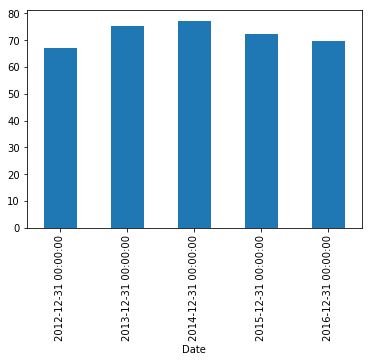

In [26]:
df['Close'].resample('A').mean().plot(kind='bar')

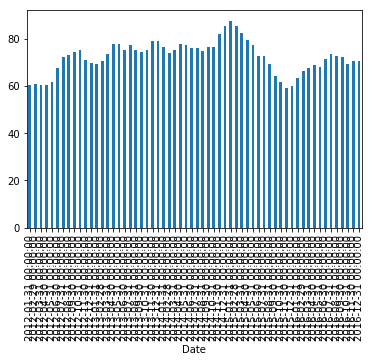

In [27]:
df['Close'].resample('M').mean().plot(kind='bar')

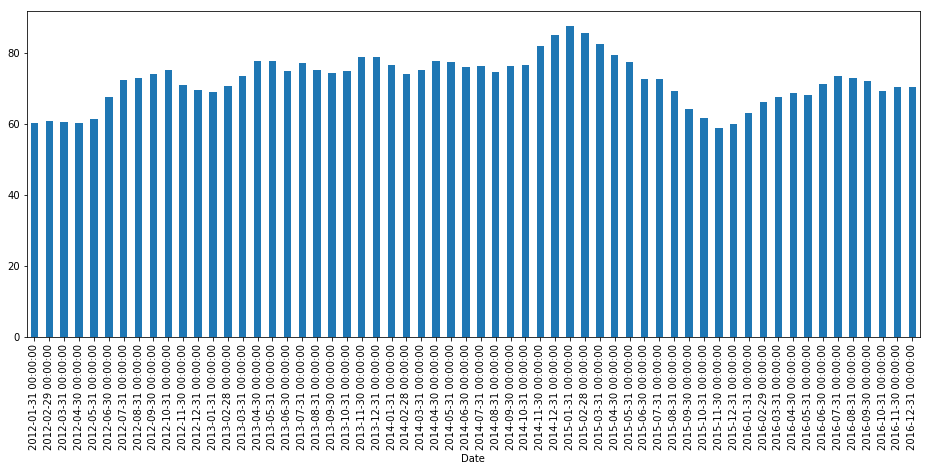

In [28]:
df['Close'].resample('M').mean().plot(kind='bar',figsize=(16,6))